In [1]:
import pandas as pd
from citipy import citipy
import requests
import json
import numpy as np
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
# generate a list of random numbers for latitude and longitude and use citipy to identify nearby city
# 300 cities above and 300 cities below equator using +ve and -ve values of latitude and longitude

lat = 90*np.random.rand(300)
lat = np.append(lat, -90*np.random.rand(300))
lng = 180*np.random.rand(300)
lng = np.append(lng, -180*np.random.rand(300))
cities =[]
citi_country=[]

for x,y in zip(lat,lng):
    city = citipy.nearest_city(x,y)
    cities.append(city.city_name)
    citi_country.append(city.country_code)

# Showing a slice of the cities
cities[0:10]


['wanning',
 'ust-kuyga',
 'tumannyy',
 'nikolskoye',
 'lorengau',
 'nyuksenitsa',
 'dombarovskiy',
 'simao',
 'beringovskiy',
 'sentyabrskiy']

In [3]:
#create a dataframe to hold city information
citi_data = pd.DataFrame(columns=['name','country','latitude','longitude','temperature','cloudiness', 'humidity', 'windspeed'])
citi_data['name']=cities
citi_data['country'] =citi_country
citi_data['country']=citi_data['country'].str.upper()
citi_data.head()

,name,country,latitude,longitude,temperature,cloudiness,humidity,windspeed
0,wanning,CN,NaN,NaN,NaN,NaN,NaN,NaN
1,ust-kuyga,RU,NaN,NaN,NaN,NaN,NaN,NaN
2,tumannyy,RU,NaN,NaN,NaN,NaN,NaN,NaN
3,nikolskoye,RU,NaN,NaN,NaN,NaN,NaN,NaN
4,lorengau,PG,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

citi_data = pd.DataFrame(columns=['name','country','latitude','longitude','temperature','cloudiness', 'humidity', 'windspeed'])
citi_data['name']=cities
citi_data['country'] =citi_country
citi_data['country']=citi_data['country'].str.upper()

# api call to openweathemap for weather info

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

#loop through the cities and collect the data with api call

for index,row in citi_data.iterrows():
    target_url = base_url+row['name']+'&appid='+api_key+'&units=imperial'
    response = requests.get(target_url).json()
    try:
        citi_data.loc[index,'latitude'] = response['coord']['lat']
        citi_data.loc[index,'longitude'] = response['coord']['lon']
        citi_data.loc[index,'temperature'] = response['main']['temp']
        citi_data.loc[index,'cloudiness'] = response['clouds']['all']
        citi_data.loc[index,'humidity'] = response['main']['humidity']
        citi_data.loc[index,'windspeed'] = response['wind']['speed']
        print(f'Processing record {index} | {citi_data.loc[index,"name"]}')
    except (NameError,KeyError) as e:
        print(f'{index}. {citi_data.loc[index,"name"]} information not found')

citi_data.dropna(inplace=True)
citi_data.drop_duplicates()


Processing record 0 | wanning
Processing record 1 | ust-kuyga
2. tumannyy information not found
Processing record 3 | nikolskoye
Processing record 4 | lorengau
Processing record 5 | nyuksenitsa
Processing record 6 | dombarovskiy
Processing record 7 | simao
Processing record 8 | beringovskiy
9. sentyabrskiy information not found
Processing record 10 | kumluca
Processing record 11 | tiksi
Processing record 12 | airai
Processing record 13 | raudeberg
Processing record 14 | halden
Processing record 15 | jiuquan
Processing record 16 | sanmenxia
Processing record 17 | kafanchan
Processing record 18 | saskylakh
Processing record 19 | katsuura
Processing record 20 | severo-kurilsk
21. mullaitivu information not found
Processing record 22 | berlevag
Processing record 23 | longyearbyen
Processing record 24 | leningradskiy
Processing record 25 | nikolskoye
Processing record 26 | anadyr
27. nizhneyansk information not found
28. gornouralskiy information not found
Processing record 29 | colgong
Pro

Processing record 250 | airai
Processing record 251 | kungurtug
Processing record 252 | tiksi
Processing record 253 | sobolevo
Processing record 254 | surovikino
Processing record 255 | korla
Processing record 256 | visby
Processing record 257 | floro
Processing record 258 | khani
Processing record 259 | vardo
Processing record 260 | tiksi
Processing record 261 | great yarmouth
Processing record 262 | petropavlovsk-kamchatskiy
Processing record 263 | jinka
Processing record 264 | berlevag
Processing record 265 | palu
266. belushya guba information not found
Processing record 267 | bo rai
268. karaul information not found
Processing record 269 | sobolevo
Processing record 270 | ostrovnoy
Processing record 271 | tiksi
Processing record 272 | pevek
Processing record 273 | nikolskoye
Processing record 274 | riyadh
Processing record 275 | tiksi
Processing record 276 | ola
Processing record 277 | hami
Processing record 278 | bardiyah
Processing record 279 | kurilsk
Processing record 280 | la

Processing record 497 | coihaique
Processing record 498 | coahuayana
Processing record 499 | coihaique
Processing record 500 | mataura
Processing record 501 | ushuaia
Processing record 502 | coquimbo
Processing record 503 | mataura
Processing record 504 | puerto ayora
Processing record 505 | puerto ayora
Processing record 506 | lebu
Processing record 507 | punta arenas
Processing record 508 | puerto ayora
Processing record 509 | lebu
Processing record 510 | ushuaia
Processing record 511 | mataura
Processing record 512 | ushuaia
Processing record 513 | puerto ayora
Processing record 514 | avarua
Processing record 515 | vaini
Processing record 516 | punta arenas
Processing record 517 | ushuaia
Processing record 518 | atuona
Processing record 519 | rikitea
Processing record 520 | rikitea
Processing record 521 | punta arenas
Processing record 522 | faanui
Processing record 523 | avarua
Processing record 524 | necochea
Processing record 525 | vaini
Processing record 526 | lebu
Processing re

,name,country,latitude,longitude,temperature,cloudiness,humidity,windspeed
0,wanning,CN,18.8003,110.397,81.72,68,89,11.5
1,ust-kuyga,RU,70.0167,135.6,48.34,8,59,8.08
3,nikolskoye,RU,59.7035,30.7861,50.97,2,59,5.12
4,lorengau,PG,-2.0226,147.271,82.18,83,77,11.36
5,nyuksenitsa,RU,60.4128,44.2397,43.11,100,68,7.99
...,...,...,...,...,...,...,...,...
567,calama,CL,-22.4667,-68.9333,65.62,0,17,12.55
572,rio gallegos,AR,-51.6226,-69.2181,37.35,28,57,27.83
576,huarmey,PE,-10.0681,-78.1522,69.8,80,76,9.91
582,luderitz,NA,-26.6481,15.1594,62.37,54,66,17.87


In [5]:
# convert numeric data to float
citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']] = citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']].astype(float)
# write data to csv file
citi_data.to_csv('../output/citi_data.csv')

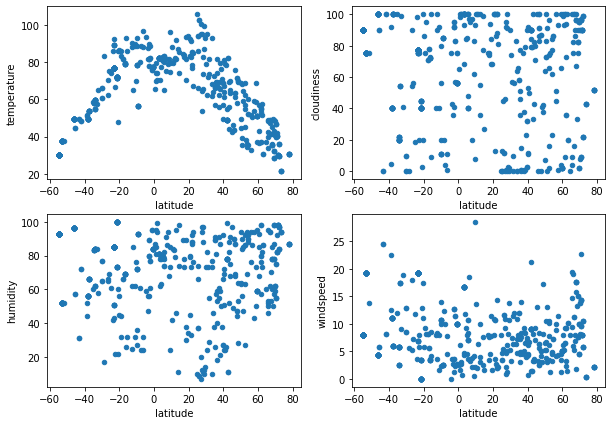

In [6]:
# scatter plots

fig,ax=plt.subplots(2,2, figsize=(10,7))
citi_data.plot.scatter(x='latitude',y='temperature', ax = ax[0,0])
citi_data.plot.scatter(x='latitude',y='cloudiness', ax = ax[0,1])
citi_data.plot.scatter(x='latitude',y='humidity', ax = ax[1,0])
citi_data.plot.scatter(x='latitude',y='windspeed', ax = ax[1,1])
plt.savefig('../output/scatter_plots.png')

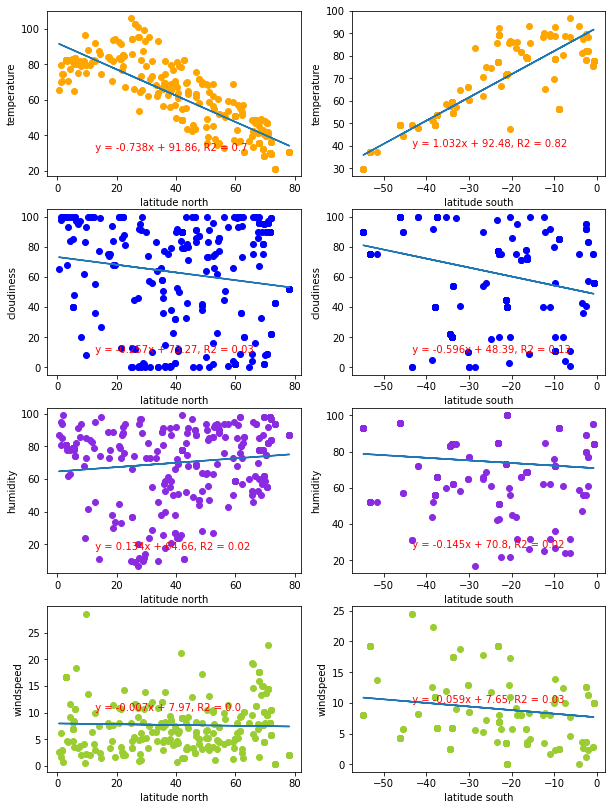

In [7]:
# regression plots for the collected data

var_list =['temperature','cloudiness','humidity','windspeed']
color_list =['orange','blue','blueviolet','yellowgreen']
north = citi_data['latitude']>0
south = citi_data['latitude']<0
fig,ax1 = plt.subplots(4,2,figsize=(10,14))


for index,variable in enumerate(var_list):
    x_north = citi_data.loc[north,'latitude']
    x_south = citi_data.loc[south,'latitude']
    y_north = citi_data.loc[north,variable]
    y_south = citi_data.loc[south,variable]  

    ax1[index,0].scatter(x=x_north,y=y_north,color=color_list[index])
    ax1[index,0].set(ylabel = variable, xlabel='latitude north' )
    ax1[index,1].scatter(x=x_south,y=y_south,color=color_list[index])
    ax1[index,1].set(ylabel = variable, xlabel='latitude south')
    
    (slope_n, intercept_n, rval_n, pval, stderr) = linregress(x_north,y_north)
    (slope_s, intercept_s, rval_s, pval, stderr) = linregress(x_south,y_south)
    
    yval_north = slope_n*x_north + intercept_n
    yval_south = slope_s*x_south + intercept_s
    ax1[index,0].plot(x_north,yval_north)
    ax1[index,1].plot(x_south,yval_south)
    eqn_north = f'  y = {round(slope_n,3)}x + {round(intercept_n,2)}, R2 = {round(rval_n*rval_n,2)}'
    eqn_south = f'  y = {round(slope_s,3)}x + {round(intercept_s,2)}, R2 = {round(rval_s*rval_s,2)}'
    ymin = y_north.min()
    xmin = x_north.min()
    ax1[index,0].annotate(eqn_north,(xmin+10,ymin+10),fontsize=10,color="red")
    ymin = y_south.min()  
    xmin = x_south.min()
    ax1[index,1].annotate(eqn_south,(xmin+10,ymin+10),fontsize=10,color="red")
    
plt.savefig('../output/regression_plots.png') 